In [8]:
import tensorflow as tf  
import cv2             
import matplotlib.pyplot as plt   
import numpy as np               
import os    
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
training_data=[]
Datadiractory="dataset"
Classes=["closed","open"]
img_size=100
def create_training_data():
    for category in Classes:
        path=os.path.join(Datadiractory,category)
        class_num=Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                backtorgb=cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_img_array=cv2.resize(backtorgb,(img_size,img_size))
                training_data.append([new_img_array,class_num])
            except Exception as e:
                pass

In [10]:
create_training_data()


In [11]:
print(len(training_data))

4382


In [12]:
import random  #overfitting 

random.shuffle(training_data)

In [13]:
X=[]
y=[]

for features,label in training_data:
    X.append(features)
    y.append(label)
    
X=np.array(X).reshape(-1,img_size,img_size,3)

In [14]:
X.shape

(4382, 100, 100, 3)

In [15]:
#normalize the data 
X=X/255.0 

In [16]:
Y=np.array(y)

In [17]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape=(100,100,3),activation="relu"))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(16,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(16,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(64,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))
y_test=Y

In [18]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])

In [21]:
model_history=model.fit(X,Y,epochs=50,validation_split=0.2) #training 

Epoch 1/50
110/110 [==============================] - 23s 198ms/step - loss: 0.6807 - accuracy: 0.5618 - val_loss: 0.5811 - val_accuracy: 0.7446
Epoch 2/50
110/110 [==============================] - 22s 199ms/step - loss: 0.4707 - accuracy: 0.7863 - val_loss: 0.3433 - val_accuracy: 0.8666
Epoch 3/50
110/110 [==============================] - 22s 203ms/step - loss: 0.3507 - accuracy: 0.8631 - val_loss: 0.2921 - val_accuracy: 0.8826
Epoch 4/50
110/110 [==============================] - 22s 203ms/step - loss: 0.2909 - accuracy: 0.8850 - val_loss: 0.2408 - val_accuracy: 0.9031
Epoch 5/50
110/110 [==============================] - 22s 203ms/step - loss: 0.2483 - accuracy: 0.9064 - val_loss: 0.2137 - val_accuracy: 0.9190
Epoch 6/50
110/110 [==============================] - 22s 204ms/step - loss: 0.2067 - accuracy: 0.9204 - val_loss: 0.1614 - val_accuracy: 0.9327
Epoch 7/50
110/110 [==============================] - 21s 195ms/step - loss: 0.1987 - accuracy: 0.9210 - val_loss: 0.1517 - val_ac

In [22]:
model.save('modeldr.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 32)       0

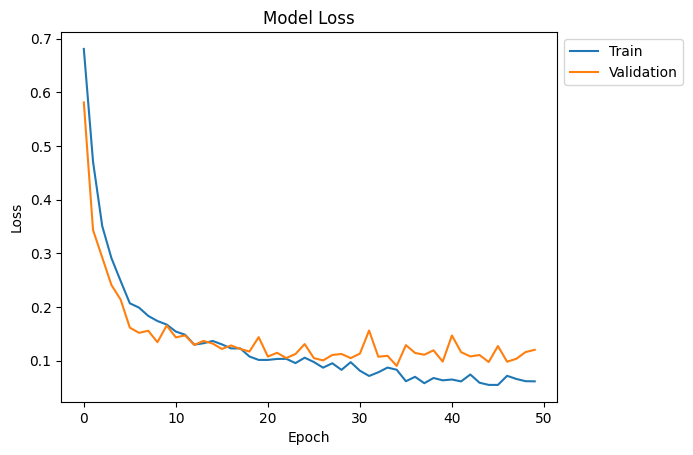

In [23]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

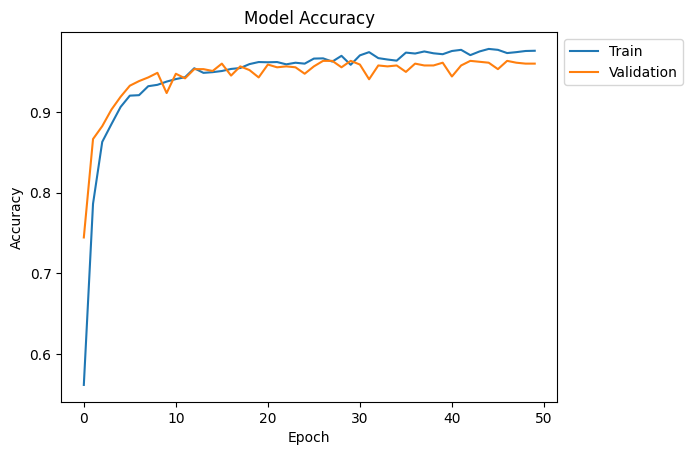

In [24]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()
pred=[]
t=model.predict(X)
for n in t:
    p=round(n[0])
    pred.append(p)

In [25]:
print('Accuracy:', np.round(metrics.accuracy_score(y_test, pred)*100,5))
print('Precision:', np.round(metrics.precision_score(y_test, pred, average='weighted'),5))
print('Recall:', np.round(metrics.recall_score(y_test,pred, average='weighted'),5))
print('F1 Score:', np.round(metrics.f1_score(y_test, pred, average='weighted'),5))

Accuracy: 98.47102
Precision: 0.98475
Recall: 0.98471
F1 Score: 0.9847


In [26]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2002
           1       0.98      0.99      0.99      2380

    accuracy                           0.98      4382
   macro avg       0.99      0.98      0.98      4382
weighted avg       0.98      0.98      0.98      4382



In [27]:
print(confusion_matrix(y_test, pred))

[[1957   45]
 [  22 2358]]


In [28]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.9383822060292648

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay
plt.show(confusion_matrix)

In [30]:
from sklearn.metrics import cohen_kappa_score,roc_auc_score
kappa = cohen_kappa_score(y_test, pred)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, pred)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, pred)
print(matrix)

Cohens kappa: 0.969163
ROC AUC: 0.984139
[[1957   45]
 [  22 2358]]


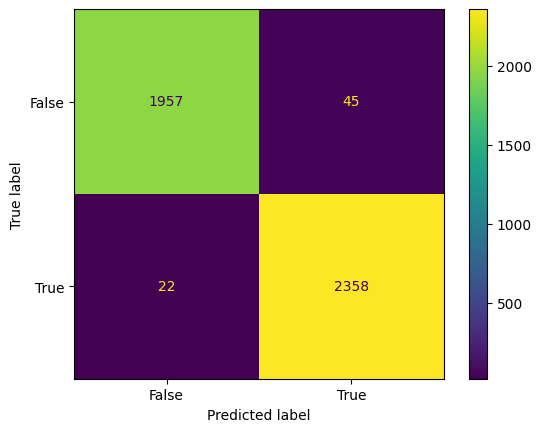

In [31]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
import cv2
import os
from keras.models import load_model
import numpy as np
import time
import winsound
frequency = 2500
duration = 1000


face = cv2.CascadeClassifier('haarcascade/haarcascade_frontalface_alt.xml')
leye = cv2.CascadeClassifier('haarcascade/haarcascade_eye.xml')
reye = cv2.CascadeClassifier('haarcascade/haarcascade_eye.xml')

eyes=cv2.CascadeClassifier('haarcascade\haarcascade_eye.xml')

lbl=['Closed eyes','Open eyes']

model = load_model('modeldr.h5')
path = os.getcwd()
cap = cv2.VideoCapture(0) #to access the camera 
font = cv2.FONT_HERSHEY_COMPLEX_SMALL
count=0
score=0
thicc=2
rpred=[99]
lpred=[99]


while(True):
    ret, frame = cap.read()   
    height,width = frame.shape[:2] 

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) 
    faces = face.detectMultiScale(gray,minNeighbors=5,scaleFactor=1.1,minSize=(25,25)) #Face detection
    eye=eyes.detectMultiScale(gray) 
    left_eye = leye.detectMultiScale(gray,1.1,4) 
    right_eye =  reye.detectMultiScale(gray,1.1,4)
    
    cv2.rectangle(frame, (0,height-50) , (200,height) , (0,0,0) ,thickness=cv2.FILLED)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y) , (x+w,y+h) , (150,150,150) , 1) 
        
    for (x,y,w,h) in eye:
        cv2.rectangle(frame, (x,y),(x+w,y+h) ,(150,150,150) , 1) 
       
    for (x,y,w,h) in right_eye:
        r_eye=frame[y:y+h,x:x+w]
        count=count+1
        r_eye = cv2.resize(r_eye,(100,100)) 
        r_eye= r_eye/255                  
        r_eye=  r_eye.reshape(100,100,-1)
        r_eye = np.expand_dims(r_eye,axis=0)
        rpred = model.predict(r_eye)

        if(rpred>=0.5):
            lbl='Open' 
        else:
            lbl='Closed'
        break

    for (x,y,w,h) in left_eye:
        l_eye=frame[y:y+h,x:x+w]
        count=count+1
        l_eye = cv2.resize(l_eye,(100,100))
        l_eye= l_eye/255
        l_eye=l_eye.reshape(100,100,-1)
        l_eye = np.expand_dims(l_eye,axis=0)
        lpred = model.predict(l_eye)
        if(lpred>=0.5):
            lbl='Open'   
        else:
            lbl='Closed'
        break

    if(lbl=="Closed" ):
        score=score+1
        cv2.putText(frame,"Closed",(10,height-20), font, 1,(255,255,255),1,cv2.LINE_AA)

    else:
        score=score-1
        cv2.putText(frame,"Open",(10,height-20), font, 1,(255,255,255),1,cv2.LINE_AA)
    
        
    if(score<0):
        score=0   
    cv2.putText(frame,'Score:'+str(score),(100,height-20), font, 1,(255,255,255),1,cv2.LINE_AA)
    if(score>5):
        cv2.putText(frame,'DROWSY DRIVER.....',(100,100), font, 1,(0,0,255),1,cv2.LINE_AA)
        winsound.Beep(frequency,duration)

        if(thicc<16):
            thicc= thicc+2
        else:
            thicc=thicc-2
            if(thicc<2):
                thicc=2
        cv2.rectangle(frame,(0,0),(width,height),(0,0,255),thicc) 
    cv2.imshow('Driver drowsiness detection',frame)
    if cv2.waitKey(1) & 0xFF == ord('s'):
        break
cap.release()
cv2.destroyAllWindows()
